In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([1, -3.2])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [12]:
data = pd.read_feather('data/simulation_halflong_4.feather')

In [13]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.751881,475.184804,516.0,0.956069,1,0
1,0,1,4.751881,511.412680,505.0,0.962545,1,0
2,0,2,4.751881,642.093954,669.0,0.968354,1,0
3,0,3,4.751881,854.356947,836.0,0.974111,3,0
4,0,4,4.751881,1148.169578,942.0,0.981589,1,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,885.944342,908.0,39.632942,42,1
59996,999,56,0.648378,839.945956,853.0,37.595696,50,1
59997,999,57,0.648378,796.884901,795.0,35.639456,74,1
59998,999,58,0.648378,755.284834,661.0,33.743259,28,1


# 3. Fit results

In [15]:
result = pd.read_feather('coverage_epidemia_nbinom_halflong_4.feather')

In [16]:
result

,b[0],b[1],"V[0,0]","V[1,0]","V[0,1]","V[1,1]"
0,0.732883,-2.816015,0.030759,-0.036855,-0.036855,0.049324
1,1.055669,-3.349488,0.041368,-0.046417,-0.046417,0.058684
2,0.700009,-2.690751,0.034039,-0.038563,-0.038563,0.048312
3,0.866882,-3.016828,0.035920,-0.040626,-0.040626,0.051159
4,0.950617,-3.221576,0.037662,-0.042587,-0.042587,0.054067
...,...,...,...,...,...,...
995,1.094924,-3.360314,0.045546,-0.052285,-0.052285,0.067711
996,0.634099,-2.752459,0.033655,-0.040864,-0.040864,0.054819
997,0.718991,-2.791038,0.031532,-0.036413,-0.036413,0.046950
998,1.031658,-3.229907,0.041233,-0.046779,-0.046779,0.059652


# 4. Confidence Region coverage test

In [17]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'nbinom')

In [18]:
bepi = np.zeros((num_sim, d))
Ts_epi = np.zeros(num_sim)
ps_epi = np.zeros(num_sim)

In [19]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    bepi[iter_sim] = result.iloc[iter_sim,:2].to_numpy()
    Ts_epi[iter_sim] = (bepi[iter_sim,1]-beta[1])/np.sqrt(result.iloc[iter_sim,-1])
    ps_epi[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_epi[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.001439 sec.
2-th simulation finished, 0.000704 sec.
3-th simulation finished, 0.000299 sec.
4-th simulation finished, 0.000252 sec.
5-th simulation finished, 0.000435 sec.
6-th simulation finished, 0.000464 sec.
7-th simulation finished, 0.000324 sec.
8-th simulation finished, 0.000322 sec.
9-th simulation finished, 0.000319 sec.
10-th simulation finished, 0.000400 sec.
11-th simulation finished, 0.000338 sec.
12-th simulation finished, 0.000328 sec.
13-th simulation finished, 0.000330 sec.
14-th simulation finished, 0.000528 sec.
15-th simulation finished, 0.000396 sec.
16-th simulation finished, 0.000368 sec.
17-th simulation finished, 0.000304 sec.
18-th simulation finished, 0.000335 sec.
19-th simulation finished, 0.000284 sec.
20-th simulation finished, 0.000387 sec.
21-th simulation finished, 0.000286 sec.
22-th simulation finished, 0.000287 sec.
23-th simulation finished, 0.000369 sec.
24-th simulation finished, 0.000332 sec.
25-th simulation finished

420-th simulation finished, 0.000123 sec.
421-th simulation finished, 0.000102 sec.
422-th simulation finished, 0.000096 sec.
423-th simulation finished, 0.000097 sec.
424-th simulation finished, 0.000099 sec.
425-th simulation finished, 0.000097 sec.
426-th simulation finished, 0.000096 sec.
427-th simulation finished, 0.000097 sec.
428-th simulation finished, 0.000098 sec.
429-th simulation finished, 0.000097 sec.
430-th simulation finished, 0.000095 sec.
431-th simulation finished, 0.000098 sec.
432-th simulation finished, 0.000097 sec.
433-th simulation finished, 0.000098 sec.
434-th simulation finished, 0.000097 sec.
435-th simulation finished, 0.000096 sec.
436-th simulation finished, 0.000098 sec.
437-th simulation finished, 0.000098 sec.
438-th simulation finished, 0.000095 sec.
439-th simulation finished, 0.000472 sec.
440-th simulation finished, 0.000129 sec.
441-th simulation finished, 0.000141 sec.
442-th simulation finished, 0.000108 sec.
443-th simulation finished, 0.0001

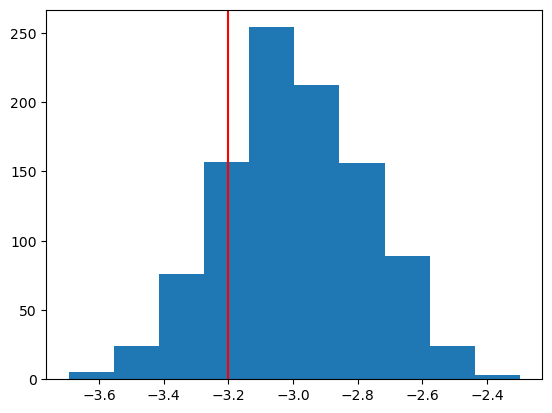

In [20]:
plt.hist(bepi[:,1])
plt.axvline(beta[1], color='red')

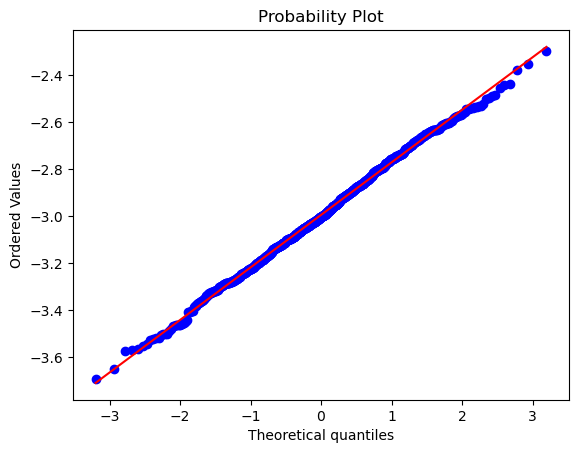

In [21]:
stats.probplot(bepi[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

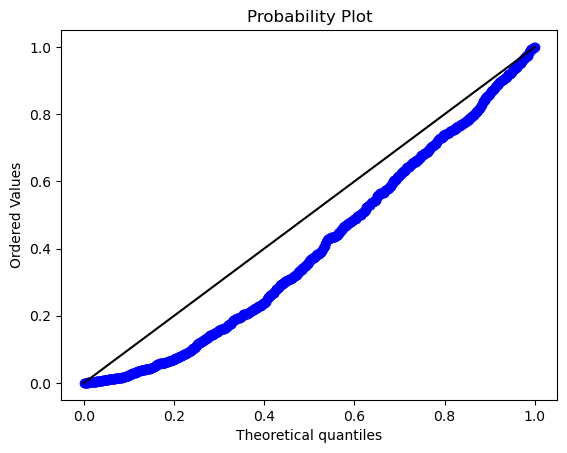

In [22]:
stats.probplot(ps_epi, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [23]:
np.mean(np.abs(ps_epi) > 0.05)

0.841